In [1]:
# Bandhav Veluri

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Constants

hbar = 1.0546e-34
m0 = 9.1094e-31
eV = 1.602e-19
Adot = 1e-10

<IPython.core.display.Javascript object>


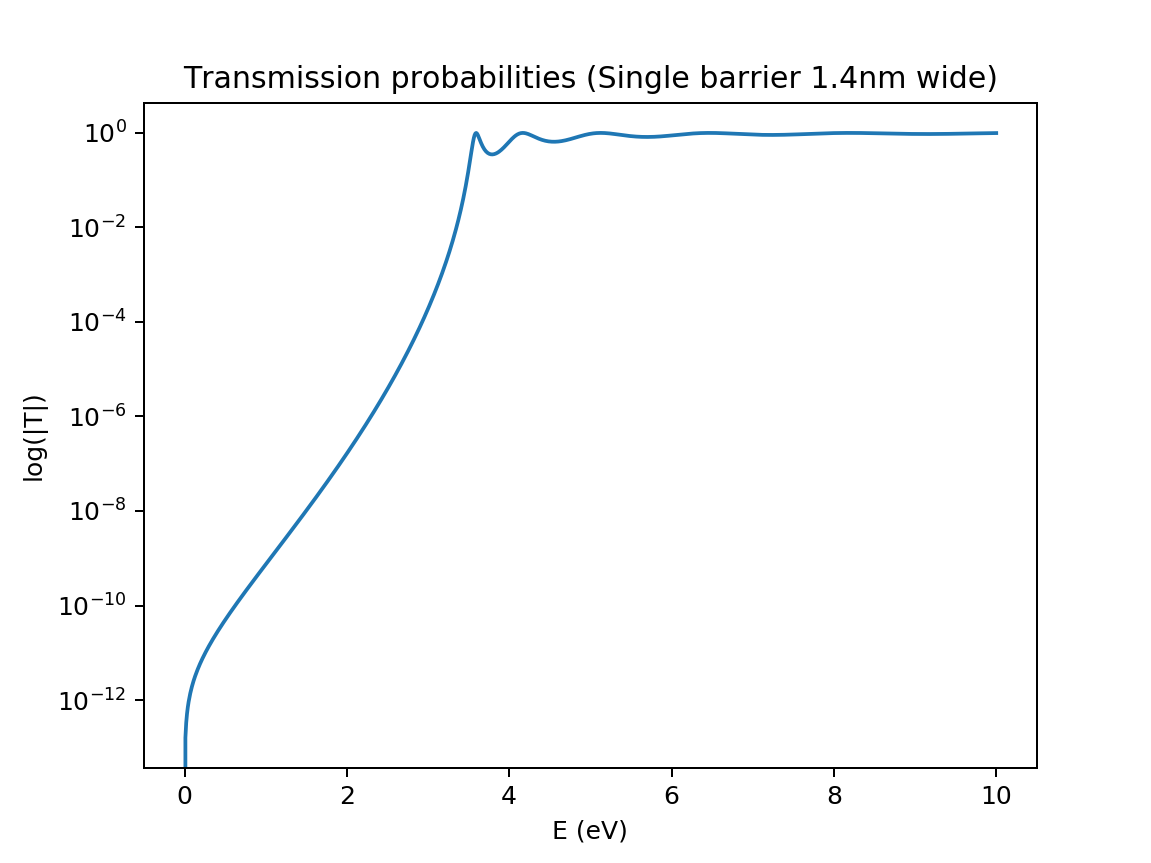

/Users/vb/anaconda3/envs/qc/lib/python3.7/site-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Transmission probabilities (Single barrier 1.4nm wide)')

In [3]:
####################################################
# 2.a
#
# Single barrier transmission probability

def K(E):
    return np.sqrt(2 * m0 * E) / hbar

def Alpha(E, qV0):
    return np.sqrt(2 * m0 * (qV0 - E)) / hbar

def Beta(E, qVD):
    return np.sqrt(2 * m0 * (E + qVD)) / hbar

def F_by_A(E, qV0, qVD, L):
    k = K(E)
    alpha = Alpha(E, qV0)
    beta = Beta(E, qVD)

    return (-4j * alpha * k * np.exp(-1j * beta * L)) \
            / (((alpha + 1j*k) * (alpha + 1j*beta) * np.exp(-1 * alpha * L)) \
               - ((alpha - 1j*k) * (alpha - 1j*beta) * np.exp(alpha*L)))

def Tprob(E, qV0, qVD, L):
    return np.absolute(F_by_A(E, qV0, qVD, L)) ** 2

L = 1.4e-9
qV0 = 3.4 * eV
qVD = 0.0 * eV
E = np.linspace(0, 10, num=1000, dtype=complex) * eV
T = Tprob(E, qV0, qVD, L)

plt.figure()
plt.plot(np.array(E, dtype=float) / eV, T)
plt.yscale('log')
plt.xlabel('E (eV)')
plt.ylabel('log(|T|)')
plt.title('Transmission probabilities (Single barrier 1.4nm wide)')

<IPython.core.display.Javascript object>


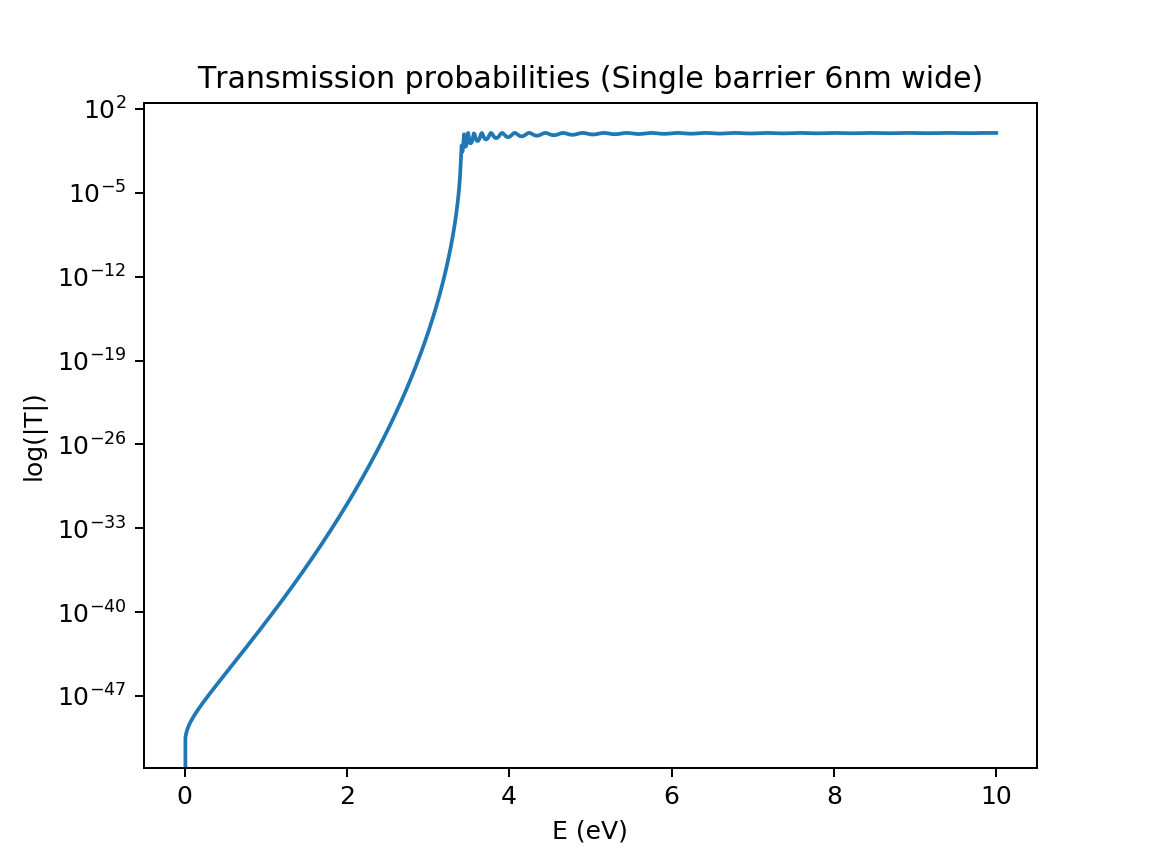

/Users/vb/anaconda3/envs/qc/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Text(0.5, 1.0, 'Transmission probabilities (Single barrier 6nm wide)')

In [4]:
#######################################################
# 2.b
#

L = 6e-9
qV0 = 3.4 * eV
qVD = 0.0 * eV
E = np.linspace(0, 10, num=1000, dtype=complex) * eV
T = Tprob(E, qV0, qVD, L)

plt.figure()
plt.plot(np.array(E, dtype=float) / eV, T)
plt.yscale('log')
plt.xlabel('E (eV)')
plt.ylabel('log(|T|)')
plt.title('Transmission probabilities (Single barrier 6nm wide)')

<IPython.core.display.Javascript object>


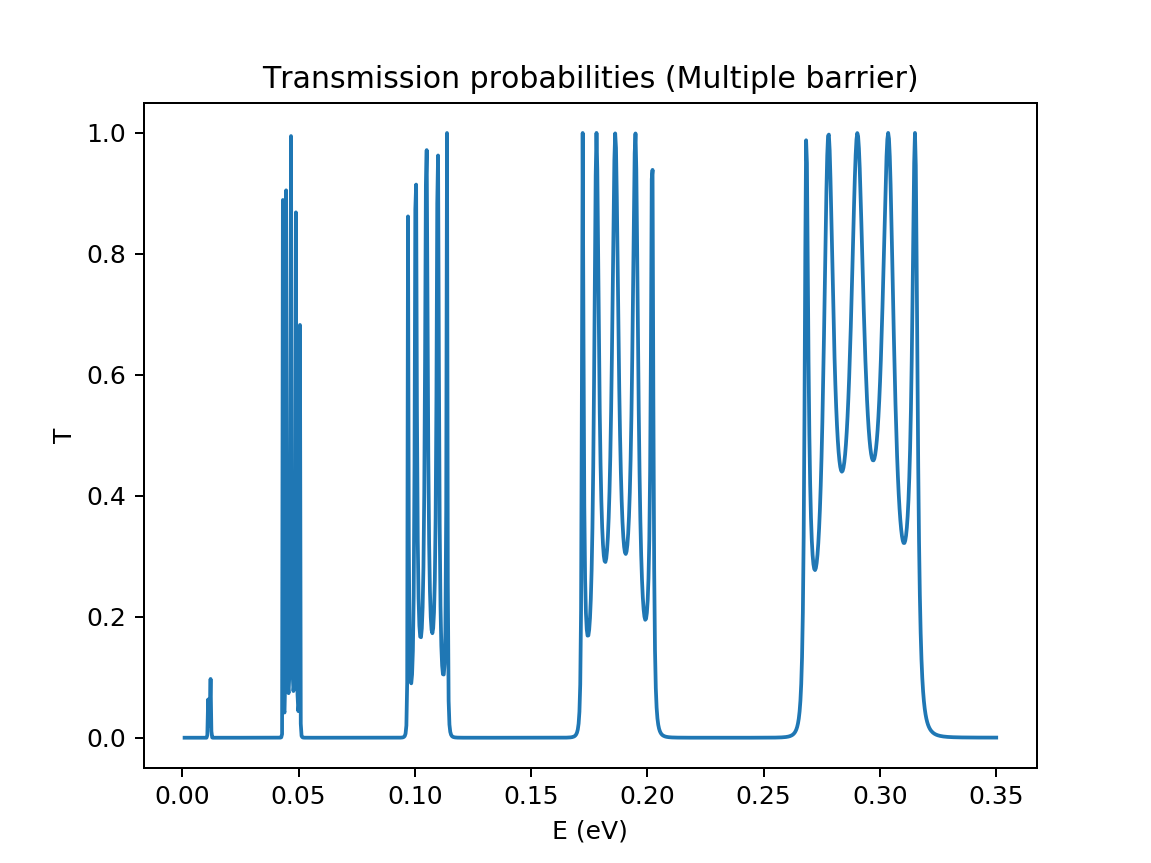

Text(0.5, 1.0, 'Transmission probabilities (Multiple barrier)')

In [5]:
#######################################
# 9
#
# Multiple barriers

def Mbarrier(E, qV0, L):
    k = K(E)
    alpha = Alpha(E, qV0)
    beta = Beta(E, 0)
    
    Mbl = (1 / (2*1j*k)) * \
            np.array([[1j*k + alpha, 1j*k - alpha],
                      [1j*k - alpha, 1j*k + alpha]])
    
    Mbr = (1 / (2*alpha)) * \
            np.array([[(alpha + 1j*beta) * np.exp(-1*alpha*L),
                       (alpha - 1j*beta) * np.exp(-1*alpha*L)],
                      [(alpha - 1j*beta) * np.exp(alpha*L),
                       (alpha + 1j*beta) * np.exp(alpha*L)]])
    
    return np.matmul(Mbl, Mbr)

def Mwell(E, L):
    k = K(E)
    M = np.array([[np.exp(-1j*k*L), 0],
                  [0, np.exp(1j*k*L)]])
    
    return M

# E is a scalar
def Tprob_multi(E, qV0, Lwell, Lbarrier):
    m = np.zeros((2,2), dtype=complex)
    for i in range(len(Lbarrier)):
        mbarrier = Mbarrier(E, qV0[i], Lbarrier[i])
    
        if i == 0:
            m = mbarrier
        else:
            mwell = Mwell(E, Lwell[i-1])
            m = np.matmul(m, mwell)
            m = np.matmul(m, mbarrier)
    
    return m

nbarriers = 6
qV0 = np.full(nbarriers, 400e-3 * eV)
Lwell = np.full(nbarriers, 50 * Adot)
Lbarrier = np.full(nbarriers, 5 * Adot)
E = np.linspace(1e-3, 350e-3, 1000) * eV

T = np.zeros(E.size)

for i in range(T.size):
    T[i] = np.absolute(1 / \
             Tprob_multi(E[i], qV0, Lwell, Lbarrier)[0,0]) ** 2

plt.figure()
plt.plot(E / eV, T)
plt.xlabel('E (eV)')
plt.ylabel('T')
plt.title('Transmission probabilities (Multiple barrier)')